In [531]:
%matplotlib inline
import requests
from pymongo import MongoClient
import json
import pandas as pd
import nltk 
import matplotlib as plt

In [2]:
#YelpPymongo.py 
from pymongo import MongoClient

#This lets pymongo about the connection we want to use, local host in our case
client = MongoClient()

#Setting context to new yelp database 
db = client.yelp

In [3]:
myCursor = db.businesses.find({"categories": ["Restaurants"]})

In [4]:
print(myCursor.count())

303


In [5]:
#dir(myCursor)

In [6]:
myCursor = db.businesses.find({"categories": ["Restaurants"]})
business_ids = []
for i in range(myCursor.count()):
    business_id = business_id = myCursor.next()['business_id']
    business_ids.append(business_id)

In [7]:
reviewsList = []
for business_id in business_ids:
    myCursor = db.reviews.find({'business_id': business_id})
    for i in range(myCursor.count()):
        reviewsList.append(myCursor[i])

In [10]:
allWordExceptPuncStopDist = nltk.FreqDist()
for review in reviewsList:
    text = review['text']
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptPunc = [w for w in allWords if w.isalpha()]
    allWordExceptPuncStop = [w for w in allWordExceptPunc if w not in stopwords]
    tempAllWordExceptPuncStopDist = nltk.FreqDist(w.lower() for w in allWordExceptPuncStop)
    allWordExceptPuncStopDist = allWordExceptPuncStopDist + tempAllWordExceptPuncStopDist

In [11]:
allWordExceptPuncStopDist.pop('i')

4517

In [12]:
allWordExceptPuncStopDist.pop('the')

1657

In [729]:
print(allWordExceptPuncStopDist.most_common(10))

[('food', 1226), ('good', 1038), ('place', 939), ('like', 607), ('service', 604), ('it', 596), ('great', 525), ('one', 505), ('get', 481), ('go', 480)]


In [730]:
len(reviewsList)

1849

In [731]:
reviewsList[0]

{'_id': ObjectId('57793d69cf8ddeb76aaaa1d2'),
 'business_id': 'rv7CY8G_XibTx82YhuqQRw',
 'date': '2013-10-14',
 'review_id': 'sXmpmDWrJltamLu7glS4GA',
 'stars': 3,
 'text': 'Are you are really looking at the review for LJS?  Its fried stuff, with extra fried stuff in a cardboard boat.  You will regret eating it 30 minutes after you finish, but it is delicious.',
 'type': 'review',
 'user_id': 'MLQre1nvUtW-RqMTc4iC9A',
 'votes': {'cool': 0, 'funny': 0, 'useful': 0}}

In [732]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    review_text = raw_review
    allWords = nltk.tokenize.word_tokenize(raw_review)
    stopwords = nltk.corpus.stopwords.words('english')
    # 1. Remove non-letters  
    allWordExceptPunc = [w for w in allWords if w.isalpha()]
    # 2. Remove stop words
    allWordExceptPuncStop = [w for w in allWordExceptPunc if w not in stopwords]
    # 3. Join the words back into one string separated by space
    words = " ".join( allWordExceptPuncStop )
    # 4. Lower case words
    words = words.lower()                            
    # and return the result.
    return(words) 

In [733]:
# Create a list of reviews to hold the clean reviews
clean_reviews = list(reviewsList)

In [734]:
clean_reviews = pd.DataFrame(clean_reviews)

In [735]:
clean_reviews

,_id,business_id,date,review_id,stars,text,type,user_id,votes
0,57793d69cf8ddeb76aaaa1d2,rv7CY8G_XibTx82YhuqQRw,2013-10-14,sXmpmDWrJltamLu7glS4GA,3,Are you are really looking at the review for L...,review,MLQre1nvUtW-RqMTc4iC9A,"{'useful': 0, 'cool': 0, 'funny': 0}"
1,57793d69cf8ddeb76aaaa1d4,rv7CY8G_XibTx82YhuqQRw,2013-11-02,QUt7RrsvsGj03kAjzBugaQ,3,I agree with Paul on this one. But I had to st...,review,dnYS5JRUt7qdeSb9yh3dkw,"{'useful': 0, 'cool': 0, 'funny': 0}"
2,57793d69cf8ddeb76aaaa1d5,rv7CY8G_XibTx82YhuqQRw,2015-08-06,wHbHDFr8TnSRrSyrfVQJjQ,4,"I love LJS and have to agree, service was dece...",review,OEn0jIoDlT_gIixzfCHADA,"{'useful': 0, 'cool': 0, 'funny': 0}"
3,57793d69cf8ddeb76aaaa1d6,rv7CY8G_XibTx82YhuqQRw,2014-04-22,EZNiAEuUhfzk_Dw_jJfYHQ,5,It's deep fried garbage....it's LOS c'mon what...,review,hZelXy7fk1fwICGvH6OMrQ,"{'useful': 0, 'cool': 1, 'funny': 1}"
4,57793d69cf8ddeb76aaaa1d7,rv7CY8G_XibTx82YhuqQRw,2015-10-16,Kqw3bju6UXfp77E20eAXBQ,2,"I love LJS, but I had to write a review regar...",review,5-EsEwC-eXHCAc654-ZNuw,"{'useful': 1, 'cool': 0, 'funny': 0}"
5,57793d69cf8ddeb76aaaa6a8,udZJ8YgsHdqtFDQkyPTV1Q,2011-08-21,E2gb87_5k4GWtTAwaYbCXw,4,"This is a pretty decent Arby's, and given the ...",review,heoc96QXrTbecWVw933qhQ,"{'useful': 0, 'cool': 0, 'funny': 0}"
6,57793d69cf8ddeb76aaaa6a9,udZJ8YgsHdqtFDQkyPTV1Q,2012-07-14,sFC483ql4AT8EW0nkpX2-A,2,Everytime I eat at this location I end up with...,review,2HPa-nvh3iOmewcS004teg,"{'useful': 0, 'cool': 0, 'funny': 0}"
7,57793d69cf8ddeb76aaaa6aa,udZJ8YgsHdqtFDQkyPTV1Q,2013-12-18,m8Q_TkYJ8_vPuyQw8bVPrg,3,Arby's is definitely king of the fast food joi...,review,N_cH3QA_eXXmnzz-nzEeKA,"{'useful': 0, 'cool': 0, 'funny': 0}"
8,57793d69cf8ddeb76aaaa6ad,udZJ8YgsHdqtFDQkyPTV1Q,2015-07-02,-_3odSbQ0jJmaynNMC7DyQ,2,My beef was so raw that I had to put it in the...,review,6l7qsLSRxPNI1-d2uUHX_A,"{'useful': 0, 'cool': 0, 'funny': 0}"
9,57793d69cf8ddeb76aaaacf3,Y3E5QDlKmjHD2zOSPASFIA,2014-01-06,fiaMnQpmOtUGZ-3nzAknnw,4,"Great pizza, and the calzones are huge. Relaxe...",review,dIQ6Rc0y4FzOEr1KYtCNeQ,"{'useful': 0, 'cool': 0, 'funny': 0}"


In [736]:
len(clean_reviews.index)

1849

In [737]:
clean_reviews.iloc[0,5]

'Are you are really looking at the review for LJS?  Its fried stuff, with extra fried stuff in a cardboard boat.  You will regret eating it 30 minutes after you finish, but it is delicious.'

In [738]:
# Get the number of reviews based on the dataframe column size
num_reviews = len(clean_reviews.index)

#
stars = pd.DataFrame(columns = ['stars_group'])
clean_reviews = pd.concat([clean_reviews, stars])

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range(num_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews.iloc[i,6] = review_to_words(clean_reviews.iloc[i,6])
    if clean_reviews.iloc[i,4] > 3:
        clean_reviews.iloc[i,5] = 1
    elif clean_reviews.iloc[i,4] == 3:
        clean_reviews.iloc[i,5] = 0
    else:
        clean_reviews.iloc[i,5] = -1
    

In [739]:
clean_reviews

,_id,business_id,date,review_id,stars,stars_group,text,type,user_id,votes
0,57793d69cf8ddeb76aaaa1d2,rv7CY8G_XibTx82YhuqQRw,2013-10-14,sXmpmDWrJltamLu7glS4GA,3,0,are really looking review ljs its fried stuff ...,review,MLQre1nvUtW-RqMTc4iC9A,"{'useful': 0, 'cool': 0, 'funny': 0}"
1,57793d69cf8ddeb76aaaa1d4,rv7CY8G_XibTx82YhuqQRw,2013-11-02,QUt7RrsvsGj03kAjzBugaQ,3,0,i agree paul one but i stop way home work toni...,review,dnYS5JRUt7qdeSb9yh3dkw,"{'useful': 0, 'cool': 0, 'funny': 0}"
2,57793d69cf8ddeb76aaaa1d5,rv7CY8G_XibTx82YhuqQRw,2015-08-06,wHbHDFr8TnSRrSyrfVQJjQ,4,1,i love ljs agree service decent i tried piece ...,review,OEn0jIoDlT_gIixzfCHADA,"{'useful': 0, 'cool': 0, 'funny': 0}"
3,57793d69cf8ddeb76aaaa1d6,rv7CY8G_XibTx82YhuqQRw,2014-04-22,EZNiAEuUhfzk_Dw_jJfYHQ,5,1,it deep fried garbage los expect i never bette...,review,hZelXy7fk1fwICGvH6OMrQ,"{'useful': 0, 'cool': 1, 'funny': 1}"
4,57793d69cf8ddeb76aaaa1d7,rv7CY8G_XibTx82YhuqQRw,2015-10-16,Kqw3bju6UXfp77E20eAXBQ,2,-1,i love ljs i write review regarding particular...,review,5-EsEwC-eXHCAc654-ZNuw,"{'useful': 1, 'cool': 0, 'funny': 0}"
5,57793d69cf8ddeb76aaaa6a8,udZJ8YgsHdqtFDQkyPTV1Q,2011-08-21,E2gb87_5k4GWtTAwaYbCXw,4,1,this pretty decent arby given condition fast f...,review,heoc96QXrTbecWVw933qhQ,"{'useful': 0, 'cool': 0, 'funny': 0}"
6,57793d69cf8ddeb76aaaa6a9,udZJ8YgsHdqtFDQkyPTV1Q,2012-07-14,sFC483ql4AT8EW0nkpX2-A,2,-1,everytime i eat location i end sick stomach i ...,review,2HPa-nvh3iOmewcS004teg,"{'useful': 0, 'cool': 0, 'funny': 0}"
7,57793d69cf8ddeb76aaaa6aa,udZJ8YgsHdqtFDQkyPTV1Q,2013-12-18,m8Q_TkYJ8_vPuyQw8bVPrg,3,0,arby definitely king fast food joints blvd for...,review,N_cH3QA_eXXmnzz-nzEeKA,"{'useful': 0, 'cool': 0, 'funny': 0}"
8,57793d69cf8ddeb76aaaa6ad,udZJ8YgsHdqtFDQkyPTV1Q,2015-07-02,-_3odSbQ0jJmaynNMC7DyQ,2,-1,my beef raw i put microwave two minutes it eve...,review,6l7qsLSRxPNI1-d2uUHX_A,"{'useful': 0, 'cool': 0, 'funny': 0}"
9,57793d69cf8ddeb76aaaacf3,Y3E5QDlKmjHD2zOSPASFIA,2014-01-06,fiaMnQpmOtUGZ-3nzAknnw,4,1,great pizza calzones huge relaxed atmosphere t...,review,dIQ6Rc0y4FzOEr1KYtCNeQ,"{'useful': 0, 'cool': 0, 'funny': 0}"


In [740]:
# Creat a random list of index values
from random import shuffle
x = [i for i in range(len(clean_reviews.index))]
shuffle(x)

In [741]:
x

[286,
 417,
 1673,
 480,
 1535,
 985,
 535,
 1199,
 101,
 1744,
 1531,
 1161,
 998,
 188,
 1492,
 631,
 1520,
 1776,
 1642,
 1561,
 1181,
 1660,
 147,
 320,
 373,
 588,
 1349,
 741,
 1099,
 504,
 298,
 1609,
 1658,
 1432,
 1787,
 7,
 239,
 576,
 1598,
 986,
 1806,
 783,
 331,
 1692,
 123,
 221,
 131,
 1460,
 1038,
 311,
 1726,
 1201,
 989,
 343,
 877,
 731,
 1695,
 810,
 530,
 403,
 1107,
 1641,
 1238,
 906,
 1824,
 999,
 575,
 425,
 887,
 594,
 1389,
 761,
 215,
 826,
 831,
 1045,
 693,
 1462,
 876,
 859,
 357,
 1392,
 339,
 1633,
 518,
 192,
 866,
 892,
 838,
 960,
 990,
 1538,
 532,
 1712,
 706,
 1119,
 676,
 240,
 1188,
 570,
 43,
 561,
 98,
 299,
 1088,
 1347,
 553,
 411,
 766,
 1311,
 109,
 420,
 1217,
 1110,
 1581,
 868,
 1774,
 1345,
 1510,
 1617,
 616,
 1635,
 13,
 1363,
 1763,
 1075,
 1228,
 506,
 910,
 788,
 1842,
 1640,
 409,
 1291,
 1077,
 1414,
 413,
 226,
 1810,
 880,
 1475,
 1239,
 1011,
 19,
 822,
 637,
 1839,
 1231,
 1480,
 510,
 430,
 1514,
 839,
 1465,
 672,
 1840,


In [742]:
clean_reviews.shape

(1849, 10)

In [743]:
train_count = int(len(clean_reviews.index)*0.80)
test_count = len(clean_reviews.index) - train_count

In [744]:
clean_train_reviews = pd.DataFrame()
for i in range(train_count):
    clean_train_reviews = clean_train_reviews.append(clean_reviews.iloc[i],ignore_index=True)

In [745]:
clean_test_reviews = pd.DataFrame()
for i in range(test_count):
    clean_test_reviews = clean_test_reviews.append(clean_reviews.iloc[(test_count - i - 1)],ignore_index=True)

In [746]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [747]:
vocab = vectorizer.get_feature_names()
print(vocab)

['aaa', 'ab', 'aberdeen', 'ability', 'able', 'abordable', 'about', 'absolute', 'absolutely', 'accent', 'accept', 'acceptable', 'accepted', 'accessible', 'accidentally', 'accidents', 'accommodating', 'accompagner', 'accompanied', 'accompaniment', 'accompany', 'accompanying', 'according', 'accordingly', 'ache', 'acknowledge', 'across', 'act', 'acting', 'action', 'actual', 'actually', 'ad', 'add', 'added', 'addicts', 'adding', 'addition', 'additional', 'address', 'adjacent', 'adjoining', 'admit', 'admitted', 'admittedly', 'adorable', 'adorned', 'adult', 'adults', 'advance', 'advantage', 'adventuring', 'adventurous', 'adversity', 'advertise', 'advertised', 'advertisement', 'advertising', 'advice', 'advise', 'advised', 'af', 'afar', 'afford', 'affordable', 'afraid', 'after', 'afternoon', 'afternoons', 'aftertaste', 'afterward', 'afterwards', 'again', 'age', 'ages', 'ago', 'agree', 'agreed', 'agréable', 'ahead', 'ai', 'air', 'airport', 'airy', 'aka', 'al', 'alas', 'alaska', 'albeit', 'albuqu

In [748]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

2 aaa
2 ab
2 aberdeen
3 ability
23 able
2 abordable
3 about
6 absolute
37 absolutely
4 accent
3 accept
6 acceptable
4 accepted
2 accessible
4 accidentally
2 accidents
5 accommodating
2 accompagner
6 accompanied
3 accompaniment
2 accompany
8 accompanying
8 according
3 accordingly
2 ache
4 acknowledge
34 across
4 act
3 acting
3 action
4 actual
87 actually
3 ad
22 add
17 added
2 addicts
7 adding
7 addition
7 additional
3 address
2 adjacent
2 adjoining
4 admit
4 admitted
7 admittedly
3 adorable
2 adorned
4 adult
4 adults
2 advance
4 advantage
1 adventuring
3 adventurous
1 adversity
3 advertise
7 advertised
2 advertisement
4 advertising
6 advice
3 advise
2 advised
3 af
2 afar
3 afford
18 affordable
5 afraid
44 after
5 afternoon
4 afternoons
2 aftertaste
2 afterward
5 afterwards
10 again
32 age
3 ages
55 ago
15 agree
6 agreed
3 agréable
12 ahead
8 ai
5 air
15 airport
2 airy
2 aka
8 al
3 alas
2 alaska
4 albeit
2 albuquerque
7 alcohol
3 alcoholic
4 alfredo
2 alien
3 alike
2 alive
54 all
2 alle

In [749]:
train_data_features.shape

(1479, 5000)

In [750]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, clean_train_reviews['stars_group'])

Training the random forest...


In [751]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews['text'])
test_data_features = test_data_features.toarray()

# Use the random forest to make stars rating group predictions
result = forest.predict(test_data_features)

resultDataFrame = pd.DataFrame(result,columns=['predict'])
output = clean_test_reviews.copy()
output['predict'] = result

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False )

In [752]:
output

,_id,business_id,date,review_id,stars,stars_group,text,type,user_id,votes,predict
0,57793d6ccf8ddeb76aadc7e3,MvnaNl1GEplkpBOBe6nOyw,2015-06-16,NdD28XHpdoB1LjTy0sG-Rw,5,1,everything amazing delicious service awsome ma...,review,Ssp1MyP40LihnAvxc97ZmQ,"{'useful': 0, 'cool': 0, 'funny': 0}",1
1,57793d6ccf8ddeb76aadc7e1,MvnaNl1GEplkpBOBe6nOyw,2014-02-10,vueJDvl0hLgh829BSZypeg,1,-1,all i say horrible i big fan carl jr recently ...,review,CP7Bt1FpjHHHb9Y7musCTg,"{'useful': 0, 'cool': 0, 'funny': 0}",-1
2,57793d6ccf8ddeb76aadc7e0,MvnaNl1GEplkpBOBe6nOyw,2013-07-09,1opw9qBpLQtBWj1OyoYj-w,3,0,i care fast food orange cream shake really goo...,review,iKs4OGcsqfkYvsuhPE-0Kg,"{'useful': 0, 'cool': 0, 'funny': 0}",0
3,57793d6ccf8ddeb76aad9285,euGwFsKJAkkO7kdgOkT9qg,2015-11-22,KbHuCIK9CN5ZmBSVd3ueXg,4,1,i started coming low price cigarettes ca beat ...,review,PVsOPaUeOy_vRGwI1kNVPA,"{'useful': 1, 'cool': 1, 'funny': 1}",1
4,57793d6ccf8ddeb76aad9283,euGwFsKJAkkO7kdgOkT9qg,2008-11-16,Do8ChAl4WhpYJOPZYMv5sQ,4,1,kinda hidden back shopping center lucky place ...,review,Mx-vxv_V-SQCe76w4RmUfA,"{'useful': 1, 'cool': 0, 'funny': 0}",1
5,57793d6ccf8ddeb76aad9282,euGwFsKJAkkO7kdgOkT9qg,2015-08-11,-TtLYaMsueSy_XgU59MurQ,1,-1,everyone i ever encountered rude seems like hi...,review,FtTid0SF_puLOQD3Y5hzhg,"{'useful': 1, 'cool': 1, 'funny': 0}",-1
6,57793d6ccf8ddeb76aad9281,euGwFsKJAkkO7kdgOkT9qg,2015-07-28,YLwqI8IVGsS__KjYdFWA9g,1,-1,all aware horror show called gaming business i...,review,KDN6lzIIRRskuP_roQrSQA,"{'useful': 0, 'cool': 0, 'funny': 0}",-1
7,57793d6ccf8ddeb76aad927f,euGwFsKJAkkO7kdgOkT9qg,2014-01-19,316Qy3kRtVbGSUj_F9YIJQ,5,1,smoker dottie one cheapest places las vegas ge...,review,iUw1iMNhytJV8OJ0CGK1Yg,"{'useful': 2, 'cool': 2, 'funny': 1}",1
8,57793d6ccf8ddeb76aad927e,euGwFsKJAkkO7kdgOkT9qg,2011-04-15,Ukk5450G5qG_TxZnC-63hg,1,-1,if ever find one dotty las vegas know problem ...,review,07-MOraFwL_8CRJuzVYagA,"{'useful': 5, 'cool': 3, 'funny': 5}",-1
9,57793d6ccf8ddeb76aad7ee8,c3QcUPlgX_3O9Airt2893Q,2009-02-07,NeiMiSjjiCZVe9XeULRZIg,3,0,this time another food trip inspired gift cert...,review,Mx-vxv_V-SQCe76w4RmUfA,"{'useful': 6, 'cool': 8, 'funny': 4}",0


In [753]:
forest.score(test_data_features,clean_test_reviews['stars_group'])

0.99729729729729732

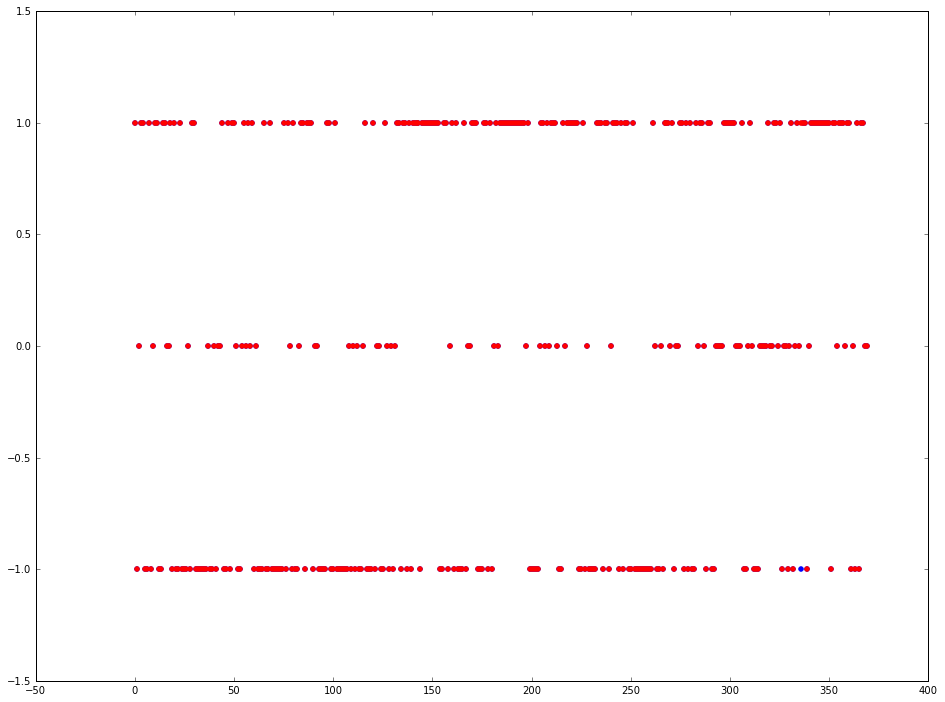

In [754]:
plt.pylab.rcParams['figure.figsize'] = 16, 12  #
plt.pyplot.scatter(output.index, output.stars_group, color = "blue")

plt.pyplot.scatter(output.index, output.predict, color = "red")